# Detección de Sexismo en Textos Ingleses

#### **Descripción del problema**

Hoy en dia, se ha vuelto cada vez más importante identificar y reducir el contenido sexista en redes sociales, dado que estas plataformas juegan un papel fundamental en la construcción de opiniones, creencias y comportamientos de sus usuarios. La persistencia de estereotipos y comentarios sexistas en redes sociales afecta de forma negativa tanto a mujeres como a hombres, y contribuye a la normalización de la desigualdad de género en la sociedad.
<br>

Conscientes de este impacto, muchas compañías detrás de las redes sociales están comenzando a tomar medidas preventivas, implementando políticas y herramientas que detecten y limiten contenido discriminatorio. En este contexto, el presente documento está alineado con la problemática de identificar el sexismo en los comentarios de redes sociales. Este proyecto busca detectar patrones de lenguaje sexista mediante el análisis de contenido textual, utilizando aprendizaje automático para reconocer actitudes y comportamientos sexistas.
<br>

La información obtenida mediante este análisis puede emplearse para diseñar proyectos preventivos.

<br>

Para lleva a cabo este trabajo, se hizo uso del siguiente dataset:

https://www.kaggle.com/datasets/aadyasingh55/sexism-detection-in-english-texts/data

<br>

En este trabajo se busca analizar los comentarios de redes sociales que son sexistas, los cuales se pueden clasificar en 4 categorias:



1.   Amenazas, planes para hacer daño e incitación.
2.   Derogación.
3.   Animosidad.
4.   Discusiones prejuiciosas.

Todos los comentarios son de personas de habla inglesa. En el dataset empleado hay 6 columnas para este conjunto de datos: rewire_id, texto, label_sexist,label_category, label_vector, split.

<br>

#### **Objetivos específicos:**

Implementar los modelos de aprendizaje de máquina: <<<<árboles de decisión,random forest, redes neunales y redes neuronales profundas>>>>. Realizar análisis y pruebas con el dataset suministrado de Kaggle. Aplicar ténicas de procesamiento al conjunto de datos.

<br>

#### **Variables del conjunto de datos**



1.   Identificador del comentario (columna "rewire_id"):

  *   Identificador único para cada entrada.

2.   texto (columna "text"):

  *   Contenido del texto en inglés para el análisis.

3. Sexista (columna "label_sexist"):

  *   Clasificación que indica si el texto es sexista.

4. Categoria (columna "label_category"):

  *  Indica la categoria del comentario sexista.

5.  Vectoizacion (columna "label_vector"):

  *  Representa una vectorización del texto.

6.  División (columna "split"):

  *  Indica la división del conjunto de datos. si es de entrenamiento o de prueba.

<br>

### **Librerias requeridas**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

!pip install unidecode

#Tratar los datos
import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode

# Importación de librerías Arboles de decision
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Obtener el dataset desde kaggle
import kagglehub
import os



#descargar las palabras reservadas
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Cargar el dataset**

In [157]:
path = kagglehub.dataset_download("aadyasingh55/sexism-detection-in-english-texts")

print("Archivos del descagable: ", os.listdir(path))

Archivos del descagable:  ['test (1).csv', 'dev.csv', 'train (2).csv']


## **Inspección del dataset**

In [158]:
filepath = os.path.join(path,  'train (2).csv') #elejir un archivo especifico
comentarios = pd.read_csv(filepath)
#comentarios = pd.read_csv(ruta local del archivo)

comentarios.head(10)

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,none,none,train
1,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,none,none,train
2,sexism2022_english-13021,woman?,not sexist,none,none,train
3,sexism2022_english-14998,Unlicensed day care worker reportedly tells co...,not sexist,none,none,train
4,sexism2022_english-7228,[USER] Leg day is easy. Hot girls who wear min...,sexist,3. animosity,3.3 backhanded gendered compliments,train
5,sexism2022_english-4196,I don't know if you should avoid this one or e...,not sexist,none,none,train
6,sexism2022_english-872,I get a new pussy every other week or whenever...,sexist,2. derogation,2.3 dehumanising attacks & overt sexual object...,train
7,sexism2022_english-11318,Release that shit,not sexist,none,none,train
8,sexism2022_english-11688,Making games is a better cope. If you like gam...,not sexist,none,none,train
9,sexism2022_english-19587,Guaranteed she chimped after being denied use ...,not sexist,none,none,train


Primeras 10 filas del dataset

In [159]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       14000 non-null  object
 1   text            14000 non-null  object
 2   label_sexist    14000 non-null  object
 3   label_category  14000 non-null  object
 4   label_vector    14000 non-null  object
 5   split           14000 non-null  object
dtypes: object(6)
memory usage: 656.4+ KB


El conjunto de datos de desarrollo tiene 2000 ejemplos, 1 variables predictora, y la variable a predecir que es la variable label_category.
Sin embargo solo nos interesaan 3 columnas de este conjunto de datos, columna text, label_sexist y label_category.

In [160]:
only_sexist = comentarios[comentarios['label_sexist'] == 'sexist'] # Hemos filtrado solo los comnetarios que son sexistas

only_sexist = only_sexist[['text', 'label_category']] # Solo nos interesan las categorias del comentario y el el comentario en si

only_sexist.head(10)

,text,label_category
4,[USER] Leg day is easy. Hot girls who wear min...,3. animosity
6,I get a new pussy every other week or whenever...,2. derogation
11,O come on there's no way any men are attracted...,2. derogation
21,Former BBC journalist Thuto Mali says that uni...,4. prejudiced discussions
25,I did. You have to have the bravery to escalat...,"1. threats, plans to harm and incitement"
31,"Not going to lie, the brutal honesty of this r...",4. prejudiced discussions
33,"Please.... take my wife, rape my daughter!! Bu...","1. threats, plans to harm and incitement"
34,Pink is very feminine so I accept this bikini ...,3. animosity
38,"Yes. Especially these days, it takes a lot to ...","1. threats, plans to harm and incitement"
39,Put a fork in Muslim-England she's done for an...,3. animosity


Como resultado tenemos solo los comentarios sexistas y sus categorias

In [161]:
only_sexist.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3398 entries, 4 to 13993
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            3398 non-null   object
 1   label_category  3398 non-null   object
dtypes: object(2)
memory usage: 79.6+ KB


Verificamos si hay datos faltantes.

In [162]:
only_sexist.isna().sum()

,0
text,0
label_category,0


In [163]:
print("En total han quedado", only_sexist.shape[0], " filas")

En total han quedado 3398  filas


<ipython-input-164-5dc9e53549b2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_category', data=only_sexist, palette={'2. derogation': 'red', '1. threats, plans to harm and incitement': 'green', '3. animosity': 'blue',


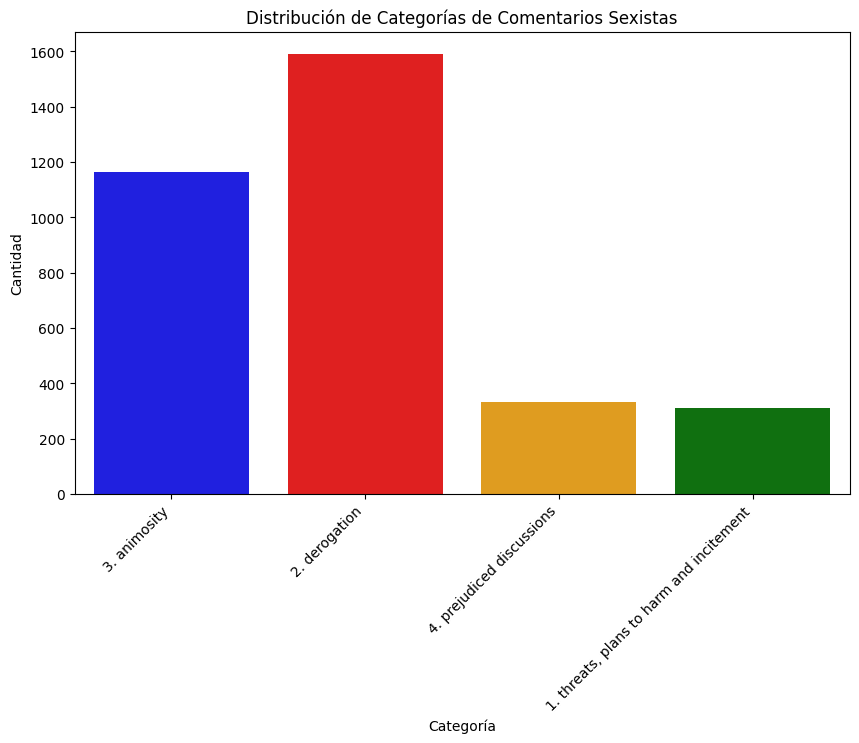

In [164]:
# Contar la frecuencia de cada categoría
category_counts = only_sexist['label_category'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
sns.countplot(x='label_category', data=only_sexist, palette={'2. derogation': 'red', '1. threats, plans to harm and incitement': 'green', '3. animosity': 'blue',
                                                             '4. prejudiced discussions': 'orange'})
plt.title('Distribución de Categorías de Comentarios Sexistas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

## **Analisis exporatorio**

Lo que se hará en el siguiente analisis es tranformar los comentarios realizando las siguientes tareas:



Eliminar la preposiciones y pronombres de una lista de tokens que estaán en ingles.

In [165]:
def eliminar_prep_pron(tokens):
    # Obtener lista de stopwords en inglés
    stop_words = set(stopwords.words('english'))

    # Identificar y etiquetar las palabras con Part-Of-Speech (POS)
    tagged_tokens = pos_tag(tokens)

    # Filtrar los tokens que no son preposiciones (IN) ni pronombres (PRP o PRP$)
    tokens_filtrados = [
        token for token, tag in tagged_tokens
        if tag not in ('IN', 'PRP', 'PRP$') and token not in stop_words
    ]

    return tokens_filtrados

Función que limpia y tokeniza un comentario:


In [166]:
def limpiar_tokenizar(texto, eliminar_prep_pron):
    lemmatizer = WordNetLemmatizer() # Crear instancia del lematizador
    nuevo_texto = texto.lower() # conbertir a minusculas

    # Eliminación de signos de puntuación
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
    nuevo_texto = unidecode(nuevo_texto)
    nuevo_texto = re.sub("\d+/\d+", ' ', nuevo_texto)
    nuevo_texto = re.sub("\d{1,2}/\d{1,2}/\d{2,4}", ' ', nuevo_texto)
    nuevo_texto = nuevo_texto.split(sep=' ')
    nuevo_texto = eliminar_prep_pron(nuevo_texto)# Eliminar preposiciones, pronombres y stopWords
    nuevo_texto = [lemmatizer.lemmatize(token) for token in nuevo_texto]

    nuevo_texto = [token for token in nuevo_texto if len(token) > 1]  # Eliminación de tokens con una longitud < 2

    return nuevo_texto

Esta función toma los valores de la columna 'text' del DataFrame 'only_sexist', los limpia y tokeniza utilizando la función 'limpiar_tokenizar', y luego asigna los resultados a la columna 'texto_tokenizado'

In [167]:
only_sexist['comentarios_tokenizados'] = only_sexist['text'].apply(lambda x: limpiar_tokenizar(x, eliminar_prep_pron))

only_sexist.head()

,text,label_category,comentarios_tokenizados
4,[USER] Leg day is easy. Hot girls who wear min...,3. animosity,"[user, leg, day, easy, hot, girl, wear, minisk..."
6,I get a new pussy every other week or whenever...,2. derogation,"[get, new, pussy, every, week, whenever, want,..."
11,O come on there's no way any men are attracted...,2. derogation,"[come, way, men, attracted, shes, pig]"
21,Former BBC journalist Thuto Mali says that uni...,4. prejudiced discussions,"[former, bbc, journalist, thuto, mali, say, un..."
25,I did. You have to have the bravery to escalat...,"1. threats, plans to harm and incitement","[bravery, escalate, touch, boob, etc, work, es..."


Se ha decidido crear un grafico de nubes de palabras para identificar cuales son las que mas se repiten por categoria.

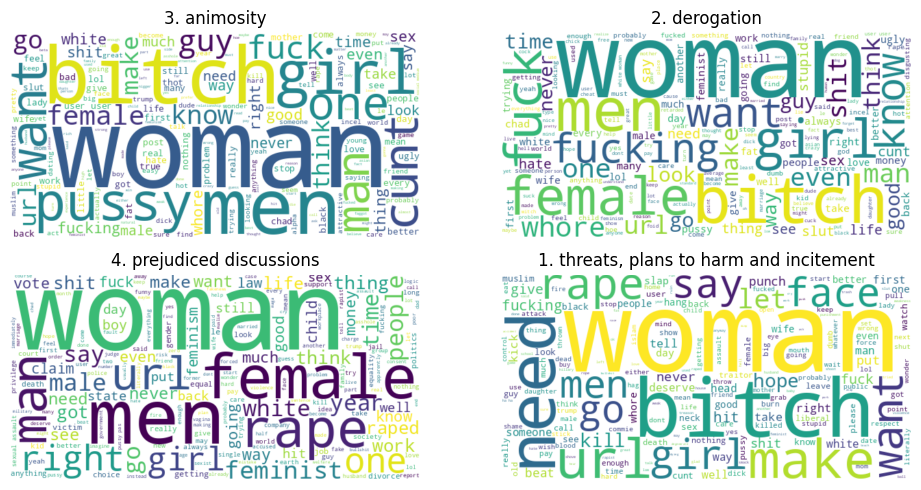

In [168]:
categorias = only_sexist['label_category'].unique()

plt.figure(figsize=(10, 5))

for i, categoria in enumerate(categorias):
    comentarios = ' '.join(only_sexist[only_sexist['label_category'] == categoria]['comentarios_tokenizados'].apply(lambda x: ' '.join(x)))

    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(comentarios)

    plt.subplot(2, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{categoria}')

plt.tight_layout()
plt.show()

Vamos observando a simple vista que la palabra que mas se repite es 'WOMAN'.

Ahora veamos mas precisamente la cantidad de palabras que hay por cada categoria:

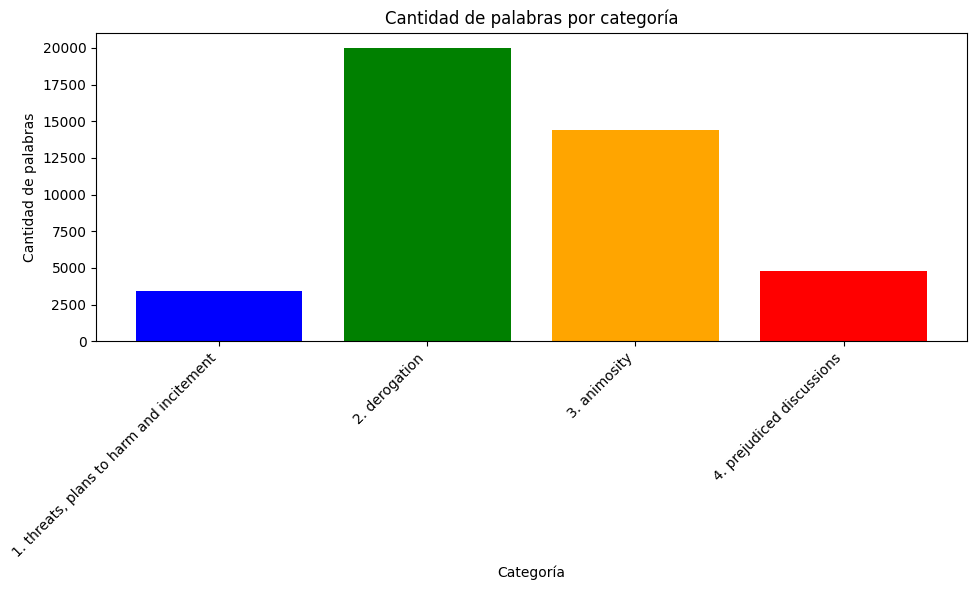

Cantidad de palabras por categoría:
label_category
1. threats, plans to harm and incitement     3429
2. derogation                               20032
3. animosity                                14396
4. prejudiced discussions                    4805
Name: comentarios_tokenizados, dtype: int64


In [169]:

num_palabras_categ = only_sexist.groupby('label_category')['comentarios_tokenizados'].apply(lambda x: x.apply(len).sum())

plt.figure(figsize=(10, 6))
plt.bar(num_palabras_categ.index, num_palabras_categ, color=['blue', 'green', 'orange', 'red'])

plt.title('Cantidad de palabras por categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de palabras')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

print("Cantidad de palabras por categoría:")
print(num_palabras_categ)

Tambien queremos saber cuantas palabras distintas hay por cada categoria.

In [170]:
palabras_unicas_por_categoria = only_sexist.groupby('label_category')['comentarios_tokenizados']\
    .apply(lambda x: set([word for sublist in x for word in sublist]))

print(palabras_unicas_por_categoria.apply(len))

label_category
1. threats, plans to harm and incitement    1661
2. derogation                               5068
3. animosity                                4268
4. prejudiced discussions                   2032
Name: comentarios_tokenizados, dtype: int64


Ahora lo que queremos analizar es cuantas palabras unicas son comunes entre categorias.

***Revisar grafico****

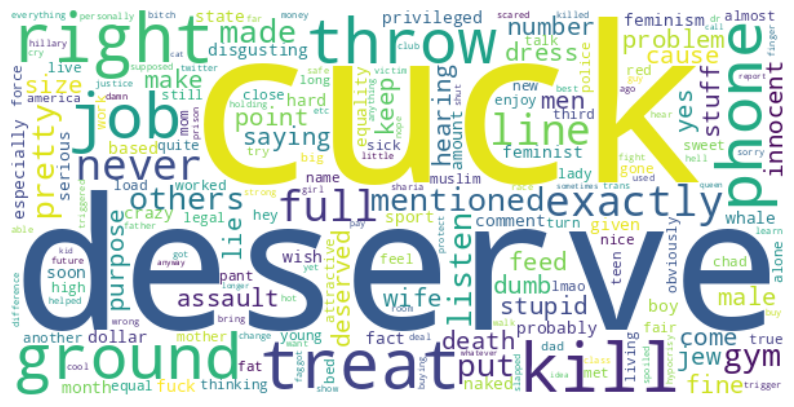

In [171]:
palabras_comunes = set.intersection(*palabras_unicas_por_categoria)

cadena = " ".join(palabras_comunes)

nube = WordCloud(width=600, height=300, background_color='white').generate(cadena)

plt.figure(figsize=(10, 6))
plt.imshow(nube, interpolation="bilinear")
plt.axis("off")
plt.show()

## **Vectorización**

In [172]:
vectorizacion = CountVectorizer(min_df=0.005)
texto_vectorizado = vectorizacion.fit_transform(only_sexist['comentarios_tokenizados'].apply(lambda x: ' '.join(x)))

only_sexist['comentarios_tokenizados'] = only_sexist['comentarios_tokenizados'].apply(lambda x: ' '.join(x))

only_sexist.head(10)

,text,label_category,comentarios_tokenizados
4,[USER] Leg day is easy. Hot girls who wear min...,3. animosity,user leg day easy hot girl wear miniskirt get ...
6,I get a new pussy every other week or whenever...,2. derogation,get new pussy every week whenever want really ...
11,O come on there's no way any men are attracted...,2. derogation,come way men attracted shes pig
21,Former BBC journalist Thuto Mali says that uni...,4. prejudiced discussions,former bbc journalist thuto mali say universal...
25,I did. You have to have the bravery to escalat...,"1. threats, plans to harm and incitement",bravery escalate touch boob etc work escalating
31,"Not going to lie, the brutal honesty of this r...",4. prejudiced discussions,going lie brutal honesty reply got rolling hah...
33,"Please.... take my wife, rape my daughter!! Bu...","1. threats, plans to harm and incitement",please take wife rape daughter whatever leave ...
34,Pink is very feminine so I accept this bikini ...,3. animosity,pink feminine accept bikini babe paid due
38,"Yes. Especially these days, it takes a lot to ...","1. threats, plans to harm and incitement",yes especially day take lot make man beat woma...
39,Put a fork in Muslim-England she's done for an...,3. animosity,put fork muslim england done saving going full...


In [173]:
only_sexist_text = pd.DataFrame(data=texto_vectorizado.toarray(), columns = vectorizacion.get_feature_names_out())
only_sexist_temp = only_sexist
only_sexist_temp.reset_index(drop=True, inplace=True)
only_sexist_text.reset_index(drop=True, inplace=True)

only_sexist_new = pd.concat([only_sexist_temp, only_sexist_text], axis=1)

only_sexist_new = pd.concat([only_sexist_temp, only_sexist_text], axis=1)
only_sexist_new.head(10)

,text,label_category,comentarios_tokenizados,act,action,actually,age,ago,agree,almost,...,world,worse,worst,would,wrong,yeah,year,yes,yet,young
0,[USER] Leg day is easy. Hot girls who wear min...,3. animosity,user leg day easy hot girl wear miniskirt get ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,I get a new pussy every other week or whenever...,2. derogation,get new pussy every week whenever want really ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,O come on there's no way any men are attracted...,2. derogation,come way men attracted shes pig,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Former BBC journalist Thuto Mali says that uni...,4. prejudiced discussions,former bbc journalist thuto mali say universal...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,I did. You have to have the bravery to escalat...,"1. threats, plans to harm and incitement",bravery escalate touch boob etc work escalating,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Not going to lie, the brutal honesty of this r...",4. prejudiced discussions,going lie brutal honesty reply got rolling hah...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Please.... take my wife, rape my daughter!! Bu...","1. threats, plans to harm and incitement",please take wife rape daughter whatever leave ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Pink is very feminine so I accept this bikini ...,3. animosity,pink feminine accept bikini babe paid due,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,"Yes. Especially these days, it takes a lot to ...","1. threats, plans to harm and incitement",yes especially day take lot make man beat woma...,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9,Put a fork in Muslim-England she's done for an...,3. animosity,put fork muslim england done saving going full...,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Metodos de implementación

#### Regresión lineal

In [174]:
x = only_sexist_new[['label_category', 'comentarios_tokenizados']]  # Catacteristicas
X = vectorizacion.fit_transform(only_sexist_new['comentarios_tokenizados']) # caracteristicas
y = only_sexist_new['label_category']  # La columna a predecir

# Mostrar las dimensiones de X Y para verificación
print(X.shape)
print(y.shape)

(3398, 432)
(3398,)


In [175]:
print(x.head())
print(y.head())


                             label_category  \
0                              3. animosity   
1                             2. derogation   
2                             2. derogation   
3                 4. prejudiced discussions   
4  1. threats, plans to harm and incitement   

                             comentarios_tokenizados  
0  user leg day easy hot girl wear miniskirt get ...  
1  get new pussy every week whenever want really ...  
2                    come way men attracted shes pig  
3  former bbc journalist thuto mali say universal...  
4    bravery escalate touch boob etc work escalating  
0                                3. animosity
1                               2. derogation
2                               2. derogation
3                   4. prejudiced discussions
4    1. threats, plans to harm and incitement
Name: label_category, dtype: object


In [176]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = LogisticRegression(max_iter=90,  C=1.9)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
report = classification_report(y_train, y_pred)



print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')


Accuracy: 0.7018502943650126
Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.79      0.56      0.66       217
                           2. derogation       0.70      0.81      0.75      1138
                            3. animosity       0.67      0.62      0.65       791
               4. prejudiced discussions       0.78      0.58      0.67       232

                                accuracy                           0.70      2378
                               macro avg       0.74      0.64      0.68      2378
                            weighted avg       0.71      0.70      0.70      2378



#### Arboles de decisión

Accuracy en el conjunto de entrenamiento: 0.7220353238015139
Accuracy en el conjunto de prueba: 0.47352941176470587
Classification Report:
                                          precision    recall  f1-score   support

1. threats, plans to harm and incitement       0.25      0.19      0.22        93
                           2. derogation       0.50      0.67      0.57       452
                            3. animosity       0.51      0.40      0.45       374
               4. prejudiced discussions       0.27      0.12      0.17       101

                                accuracy                           0.47      1020
                               macro avg       0.38      0.35      0.35      1020
                            weighted avg       0.46      0.47      0.45      1020



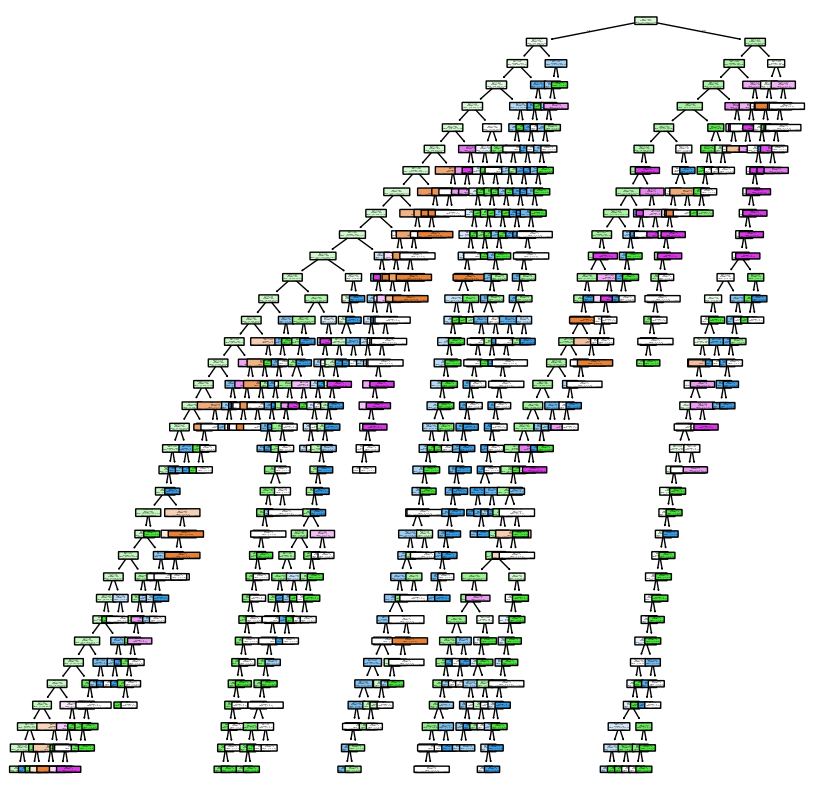

In [195]:
# Dividir los datos en conjunto de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(only_sexist['comentarios_tokenizados'],only_sexist_new['label_category'],test_size=0.3, random_state=42)

# Vectorización de los comentarios tokenizados
#X_train_vect = vectorizacion.fit_transform(X_train)
X_train_vect = X_train
#X_test_vect = vectorizacion.transform(X_test)
X_test_vect = X_test

# Entrenamiento del modelo de Árbol de Decisión
decision_tree_model = DecisionTreeClassifier(max_depth=35, min_samples_leaf=2)
decision_tree_model.fit(X_train_vect, y_train)

# Evaluación del modelo
y_train_pred = decision_tree_model.predict(X_train_vect)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Accuracy en el conjunto de entrenamiento: {accuracy_train}')

y_test_pred = decision_tree_model.predict(X_test_vect)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy en el conjunto de prueba: {accuracy_test}')

report_test = classification_report(y_test, y_test_pred)
print(f'Classification Report:\n{report_test}')

# Visualización del Árbol de Decisión
plt.figure(figsize=(10, 10))
plot_tree(decision_tree_model, filled=True, feature_names=vectorizacion.get_feature_names_out(), class_names=decision_tree_model.classes_, rounded=True)
plt.show()
